# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Wahyu Bagas Prastyo]
- **Email:** [wbagas700@gmail.com]
- **ID Dicoding:** [MC129D5Y0205]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penyewaan sepeda berdasarkan musim dan kondisi cuaca?
- Pertanyaan 2 : Seberapa besar pengaruh suhu terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Load dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Konversi kolom tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

### Assessing Data

In [5]:
print(day_df.info())
print(day_df.describe())
print(day_df.isnull().sum())
print(day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tidak ada missing values atau duplikasi data.
- Data numerik seperti temp, atemp, hum, windspeed harus divalidasi dengan skala yang benar.


### Cleaning Data

In [7]:
day_df['temp'] = day_df['temp'] * 41  # Mengonversi temp ke Celsius

**Insight:**
- Data temperatur sekarang lebih mudah diinterpretasikan.

## Exploratory Data Analysis (EDA)

### Explore ...

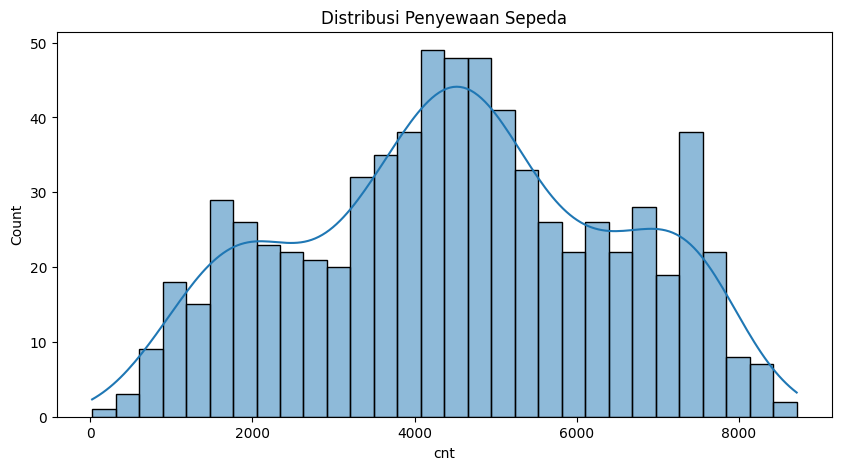

In [8]:
## Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda')
plt.show()

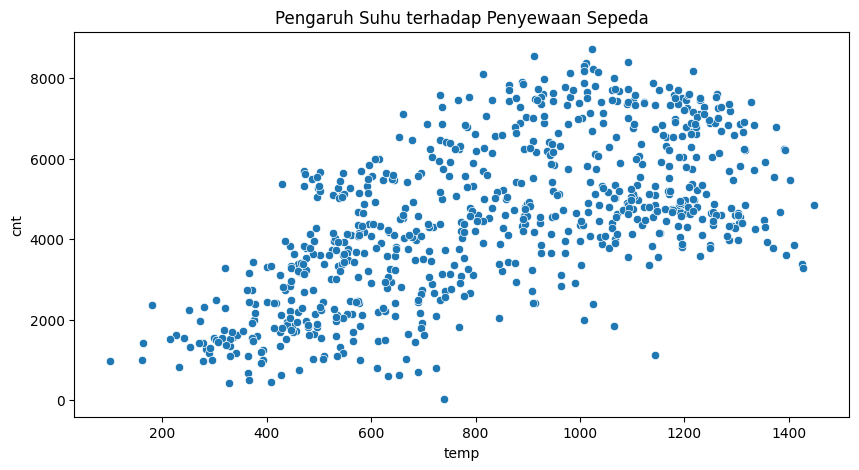

In [9]:
## Multivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'])
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.show()

**Insight:**
- Ada tren kenaikan jumlah penyewaan saat suhu meningkat, tetapi ada batas tertentu di mana tren melambat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

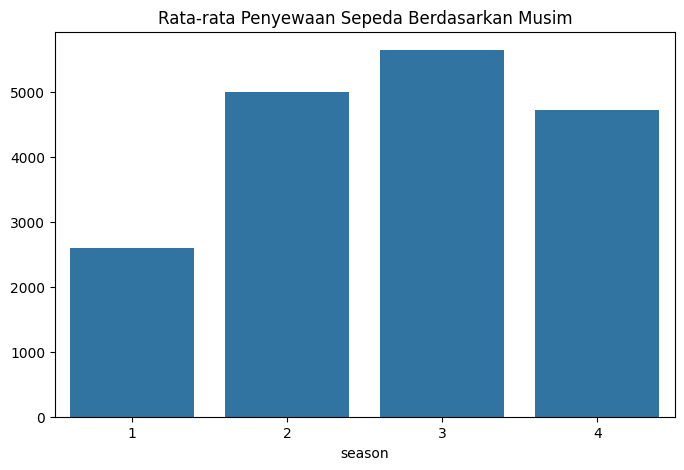

In [10]:
## Pertanyaan 1: Bagaimana tren penyewaan sepeda berdasarkan musim?
season_rentals = day_df.groupby('season')['cnt'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=season_rentals.index, y=season_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.show()

### Pertanyaan 2:

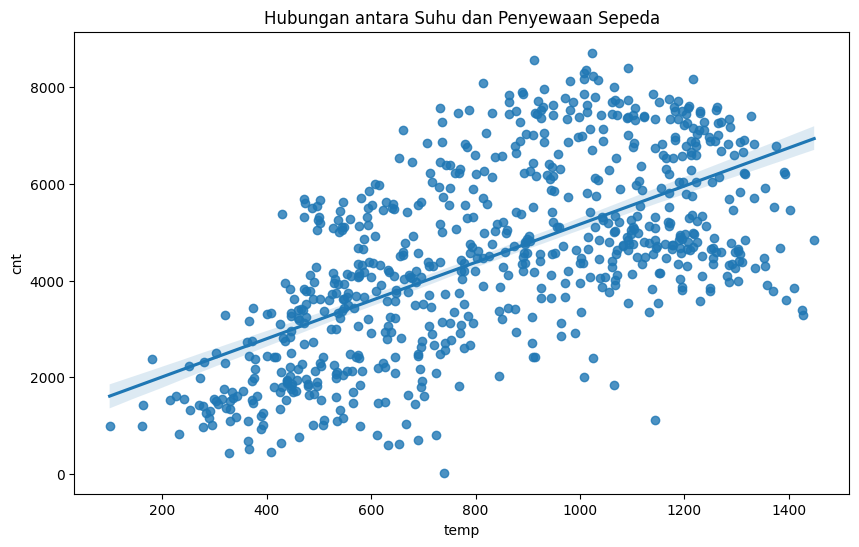

In [11]:
## Pertanyaan 2: Seberapa besar pengaruh suhu terhadap jumlah penyewaan sepeda?
plt.figure(figsize=(10, 6))
sns.regplot(x=day_df['temp'], y=day_df['cnt'])
plt.title('Hubungan antara Suhu dan Penyewaan Sepeda')
plt.show()

**Insight:**
- Musim panas memiliki jumlah penyewaan tertinggi.
- Hubungan antara suhu dan penyewaan terlihat jelas, tetapi faktor lain juga mempengaruhi.


## Analisis Lanjutan (Opsional)

In [12]:
# Clustering pengguna berdasarkan frekuensi penyewaan
bins = [0, 1000, 3000, 6000]
labels = ['Low', 'Medium', 'High']
day_df['rental_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)
print(day_df[['dteday', 'cnt', 'rental_category']].head())

      dteday   cnt rental_category
0 2011-01-01   985             Low
1 2011-01-02   801             Low
2 2011-01-03  1349          Medium
3 2011-01-04  1562          Medium
4 2011-01-05  1600          Medium


## Conclusion

- Conclution pertanyaan 1 : Bagaimana cara mengoptimalkan penyewaan di musim dingin?
- Conclution pertanyaan 2: Faktor apa selain suhu yang mempengaruhi penyewaan sepeda?